In [31]:
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")  
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [1]:
import pandas as pd 

In [26]:
import warnings
warnings.filterwarnings("ignore")


## Data collecting and preprocessing 

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe

<bound method NDFrame.describe of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df['country'].fillna("Unknown", inplace=True)

In [12]:
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

In [15]:
df['children'].fillna(0, inplace=True)

In [17]:
df.isnull().sum().sum()

0

## Analytics and reporting 

### 1). Revenue over time 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df['revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])
monthly_revenue = df.groupby('arrival_date_month')['revenue'].sum()

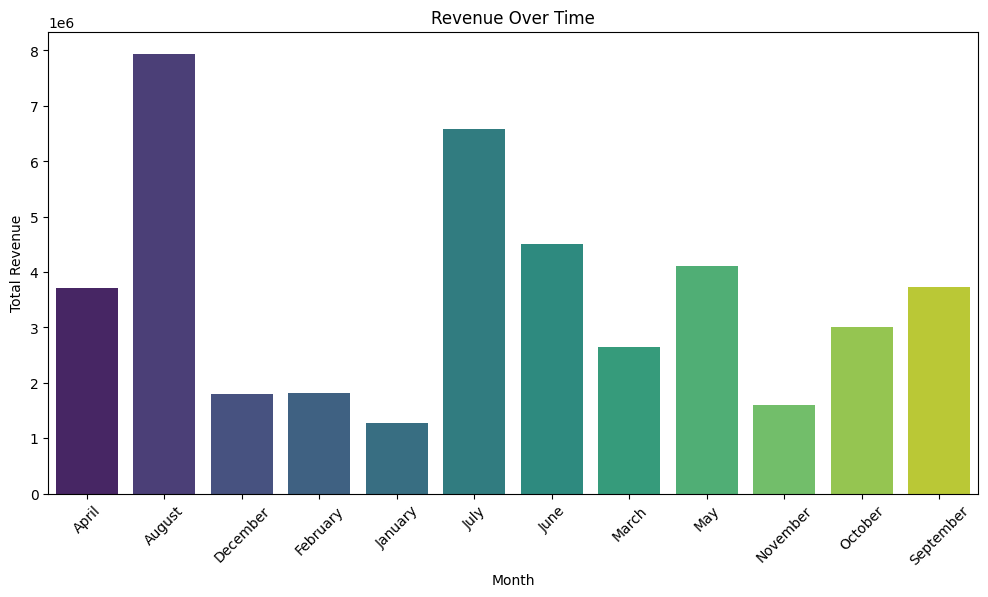

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Revenue Over Time")
plt.xticks(rotation=45)
plt.show()


### 2). Cancellation rate analysis

In [22]:
cancellation_rate = df['is_canceled'].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 37.04%


### 3). Most common booking location

In [23]:
country_counts = df['country'].value_counts().head(10)
# head(10) indicates top 10 countries 

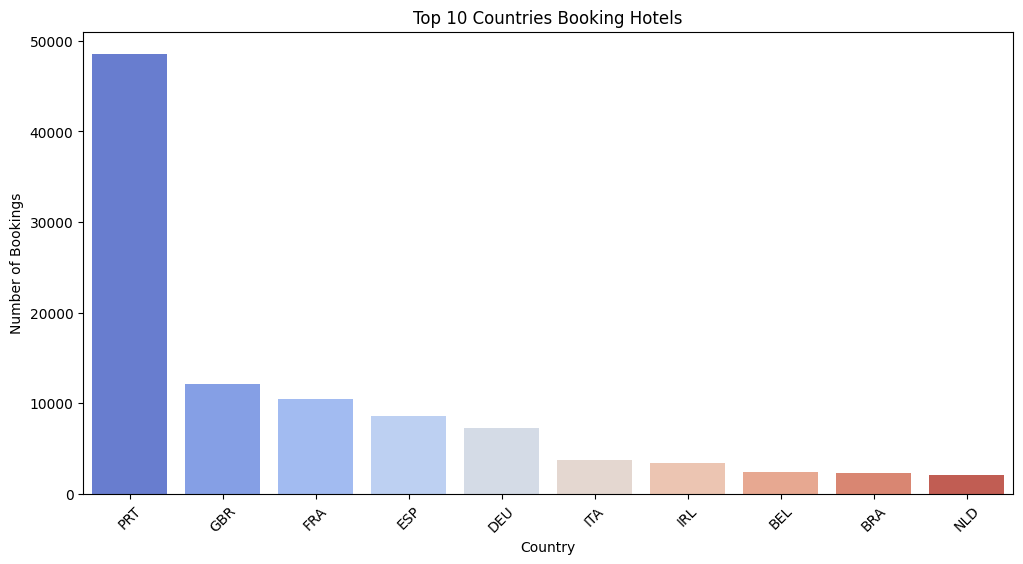

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.title("Top 10 Countries Booking Hotels")
plt.xticks(rotation=45)
plt.show()

### 4). Booking Lead Time



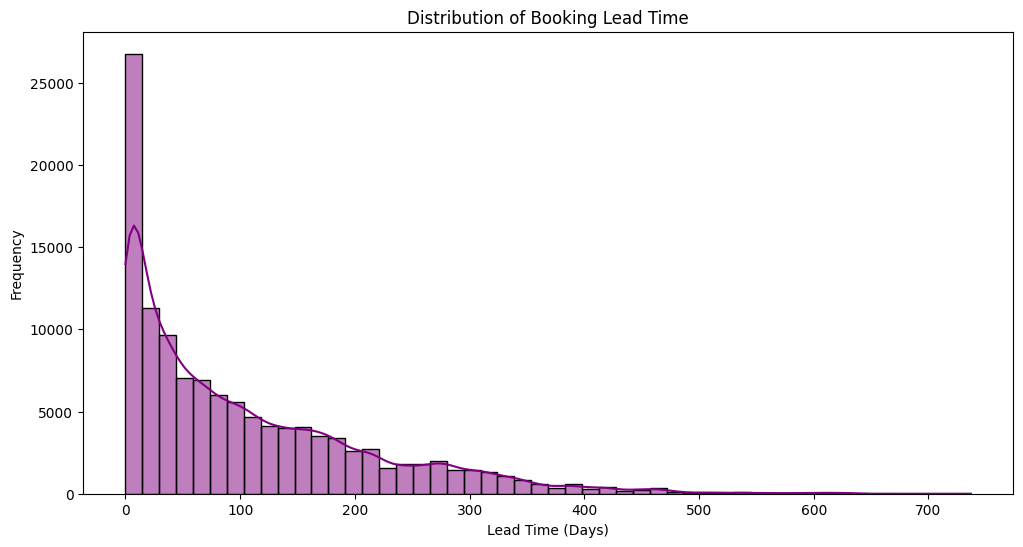

In [28]:
# days between booking and check-In

plt.figure(figsize=(12,6))
sns.histplot(df['lead_time'], bins=50, kde=True, color="purple")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of Booking Lead Time")
plt.show()

In [29]:
pip install faiss-cpu sentence-transformers



   ---------------------------------------- 0.0/13.7 MB ? eta -:--:--
    --------------------------------------- 0.3/13.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.7 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.7 MB 1.7 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/13.7 MB 780.2 kB/s eta 0:00:17
   --- ------------------------------------ 1.3/13.7 MB 1.2 MB/s eta 0:00:11
   ------ --------------------------------- 2.1/13.7 MB 1.7 MB/s eta 0:00:07
   -------- ------------------------------- 2.9/13.7 MB 2.0 MB/s eta 0:00:06
   ----------- ---------------------------- 3.9/13.7 MB 2.5 MB/s eta 0:00:04
   --------------- ------------------------ 5.2/13.7 MB 2.9 MB/s eta 0:00:03
   ------------------ --------------------- 6.3/13.7 MB 3.1 MB/s eta 0:00:03
   --------------------- ------------------ 7.3/13.7 MB 3.3 MB/s eta 0:00:02
   ------------------------ --------------- 8.4/13.7 MB 3.4 MB/s eta 0:00:02
   -------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.
pyfume 0.3.4 requires pandas==1.5.3, but you have pandas 2.2.3 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

In [32]:
model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [34]:
# Ensure 'arrival_date' is created
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' +
                                    df['arrival_date_day_of_month'].astype(str),
                                    errors='coerce')

# Verify the column exists
print(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date']].head())


   arrival_date_year arrival_date_month  arrival_date_day_of_month  \
0               2015               July                          1   
1               2015               July                          1   
2               2015               July                          1   
3               2015               July                          1   
4               2015               July                          1   

  arrival_date  
0   2015-07-01  
1   2015-07-01  
2   2015-07-01  
3   2015-07-01  
4   2015-07-01  


In [35]:
# Text data for embedding 
df['text_data'] = df['hotel'] + " " + df['arrival_date'].astype(str) + " " + \
                  "Revenue: " + df['revenue'].astype(str) + " " + \
                  "Cancellation: " + df['is_canceled'].astype(str)


In [36]:
df['text_data']

0         Resort Hotel 2015-07-01 Revenue: 0.0 Cancellat...
1         Resort Hotel 2015-07-01 Revenue: 0.0 Cancellat...
2         Resort Hotel 2015-07-01 Revenue: 75.0 Cancella...
3         Resort Hotel 2015-07-01 Revenue: 75.0 Cancella...
4         Resort Hotel 2015-07-01 Revenue: 196.0 Cancell...
                                ...                        
119385    City Hotel 2017-08-30 Revenue: 672.98 Cancella...
119386    City Hotel 2017-08-31 Revenue: 1578.01 Cancell...
119387    City Hotel 2017-08-31 Revenue: 1103.97 Cancell...
119388    City Hotel 2017-08-31 Revenue: 730.80000000000...
119389    City Hotel 2017-08-29 Revenue: 1360.8 Cancella...
Name: text_data, Length: 119390, dtype: object

In [37]:
embeddings = model.encode(df['text_data'].tolist(), convert_to_numpy=True)


In [38]:
index = faiss.IndexFlatL2(embeddings.shape[1])  # Create FAISS index
index.add(embeddings)  # Add embeddings to FAISS index


In [47]:
def answer_question(query):
    query_embedding = model.encode([query], convert_to_numpy=True)
    D, I = index.search(query_embedding, 1)  # Get the top match
    
    # Extract the first matching row and remove the index
    result = df.iloc[I[0]].to_dict()

    # Convert dictionary values from {index: value} to value
    cleaned_result = {key: list(value.values())[0] if isinstance(value, dict) else value for key, value in result.items()}

    # Convert Timestamp values to string if present
    if 'arrival_date' in cleaned_result and isinstance(cleaned_result['arrival_date'], pd.Timestamp):
        cleaned_result['arrival_date'] = cleaned_result['arrival_date'].strftime('%Y-%m-%d')

    return cleaned_result


In [48]:
print(answer_question("Show me total revenue for July 2017."))


{'hotel': 'Resort Hotel', 'is_canceled': 0, 'lead_time': 128, 'arrival_date_year': 2017, 'arrival_date_month': 'July', 'arrival_date_week_number': 29, 'arrival_date_day_of_month': 17, 'stays_in_weekend_nights': 3, 'stays_in_week_nights': 6, 'adults': 2, 'children': 0.0, 'babies': 0, 'meal': 'BB', 'country': 'BRA', 'market_segment': 'Online TA', 'distribution_channel': 'TA/TO', 'is_repeated_guest': 0, 'previous_cancellations': 0, 'previous_bookings_not_canceled': 0, 'reserved_room_type': 'A', 'assigned_room_type': 'A', 'booking_changes': 0, 'deposit_type': 'No Deposit', 'agent': 240.0, 'company': 0.0, 'days_in_waiting_list': 0, 'customer_type': 'Transient', 'adr': 168.89, 'required_car_parking_spaces': 0, 'total_of_special_requests': 1, 'reservation_status': 'Check-Out', 'reservation_status_date': '26-07-17', 'revenue': 1520.0099999999998, 'arrival_date': '2017-07-17', 'text_data': 'Resort Hotel 2017-07-17 Revenue: 1520.0099999999998 Cancellation: 0'}


##  API Development using FastAPI

In [49]:
pip install fastapi uvicorn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
